In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from celluloid import Camera
import ffmpeg

In [13]:
time, X, Y = [], [], []
with open('./input/input64.txt') as f:
  input = f.readlines()
  number_x_y = int(len(input))  # количество тел

for i in range(number_x_y):
  X.append([])
  Y.append([])


with open('./output/output_par_64.txt') as f:
  for line in f:
    # time, x_1, y_1, x_2, y_2, ..., x_n, y_n
    line_s = line.split()
    time.append(float(line_s[0]))
    counter=1
    for i in range(len(line_s)):
      
      if i%2==0 and i!=0:
        Y[i-counter-1].append(float(line_s[i]))
        counter+=1

      elif i%2!=0 and i!=0:
        X[i-counter].append(float(line_s[i]))


In [3]:
import seaborn as sns
from seaborn import set_style
set_style('darkgrid')

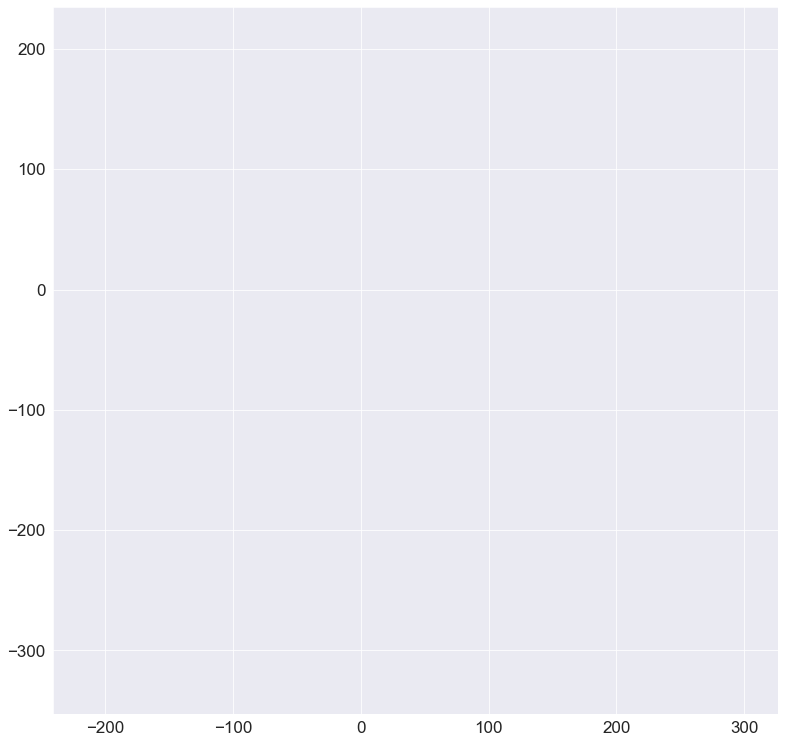

In [14]:
fig, ax = plt.subplots(figsize=(13, 13))  
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

camera = Camera(fig)
for t in range(0, len(time), 20):
    for i in range(number_x_y):
        ax.plot(X[i][t], Y[i][t], 'ro')  # X[i], Y[i] - координаты тела i во все моменты времени, X[i][t], Y[i][t] - в конкретный момент времени
     
    camera.snap()

    # if t==20000:
    #     break

from IPython.display import HTML
animation = camera.animate()
HTML(animation.to_html5_video())

# Графики времени выполнения, ускорения и эффективности

In [30]:
number_of_points = [4, 8, 16, 32, 64]
time_parallel = {}

for n in number_of_points:
    time_parallel[n] = []

    with open(f'./output/time_par_{n}.txt') as f:
        for line in f:
            time_parallel[n].append(float(line))

mean_time_parallel = []
for n in number_of_points:
    mean_time_parallel.append(np.mean(time_parallel[n]))

In [31]:
time_serial = {}

for n in number_of_points:
    time_serial[n] = []

    with open(f'./output/time_seq_{n}.txt') as f:
        for line in f:
            time_serial[n].append(float(line))

mean_time_serial = []
for n in number_of_points:
    mean_time_serial.append(np.mean(time_serial[n]))

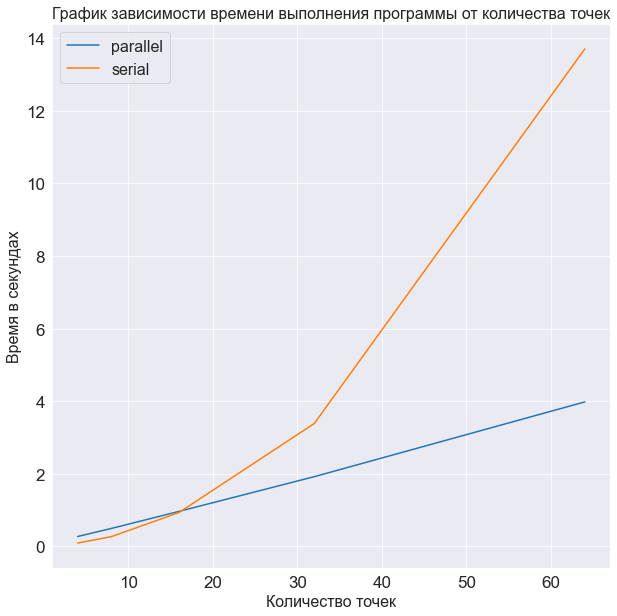

In [37]:
plt.figure(figsize=(10, 10))
plt.plot(number_of_points, mean_time_parallel)
plt.plot(number_of_points, mean_time_serial)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel('Количество точек', fontsize=16)
plt.ylabel('Время в секундах', fontsize=16)
plt.title("График зависимости времени выполнения программы от количества точек", size=16)
plt.legend(['parallel', 'serial'], fontsize=16)

**Ускорение**

In [33]:
# S = T_serial/T_parallel
speed_up = []
for i in range(len(number_of_points)):
    speed_up.append(mean_time_serial[i]/mean_time_parallel[i])
speed_up

[0.32480512244255244,
 0.5406251145690412,
 0.9670063394783845,
 1.7639008605393578,
 3.445148849922107]

Text(0.5, 1.0, 'График зависимости ускорения от количества точек')

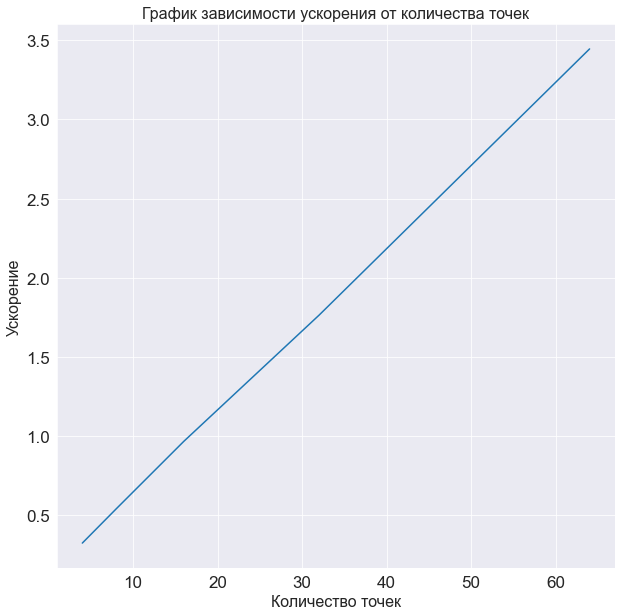

In [38]:
plt.figure(figsize=(10, 10))
plt.plot(number_of_points, speed_up)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel('Количество точек', fontsize=16)
plt.ylabel('Ускорение', fontsize=16)
plt.title("График зависимости ускорения от количества точек", size=16)

**Эффективность**

In [41]:
# E = speed_up/number of threads
efficiency = []
for i in range(len(number_of_points)):
    efficiency.append(speed_up[i]/number_of_points[i])
efficiency

[0.08120128061063811,
 0.06757813932113015,
 0.060437896217399034,
 0.05512190189185493,
 0.05383045078003292]

Text(0.5, 1.0, 'График зависимости эффективности от количества точек')

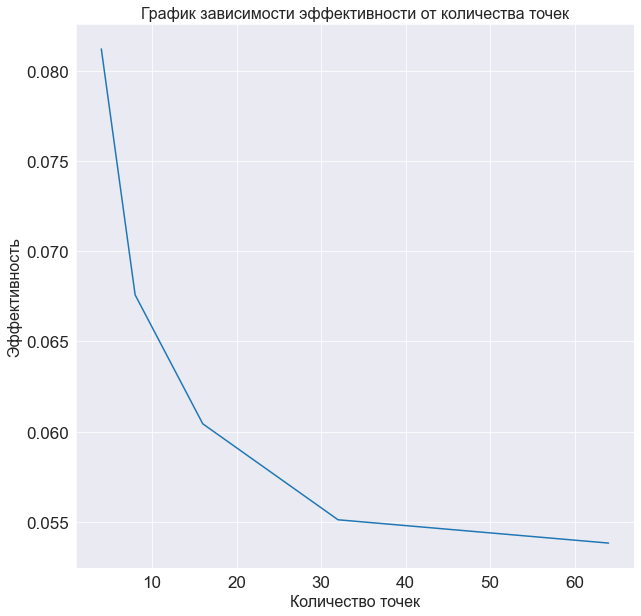

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(number_of_points, efficiency)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel('Количество точек', fontsize=16)
plt.ylabel('Эффективность', fontsize=16)
plt.title("График зависимости эффективности от количества точек", size=16)

In [13]:
import numpy as np
size = 1024
f = open(f"input/input{size}.txt", 'w')
for i in range(size):
    f.write(str(np.random.uniform(-10, 10)) + " " + str(np.random.uniform(-10, 10)) + " " + str(0) + " " + str(0) + " " + str(1000000000000) + "\n")
f.close()

**Новая параллельная версия**

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
number_of_points_new = [512, 1024]
time_parallel_old = {}
time_parallel_new = {}
time_serial_new = {}

for n in number_of_points_new:
    time_parallel_old[n] = []
    time_parallel_new[n] = []
    time_serial_new[n] = []

    with open(f'./output/time_par_old_{n}.txt') as f:
        for line in f:
            time_parallel_old[n].append(float(line))
    with open(f'./output/time_par_new_{n}.txt') as f:
        for line in f:
            time_parallel_new[n].append(float(line))
    with open(f'./output/time_seq_{n}.txt') as f:
        for line in f:
            time_serial_new[n].append(float(line))
    
    

mean_time_parallel_old = []
mean_time_parallel_new = []
mean_time_serial_new = []
for n in number_of_points_new:
    mean_time_parallel_old.append(np.mean(time_parallel_old[n]))
    mean_time_parallel_new.append(np.mean(time_parallel_new[n]))
    mean_time_serial_new.append(np.mean(time_serial_new[n]))

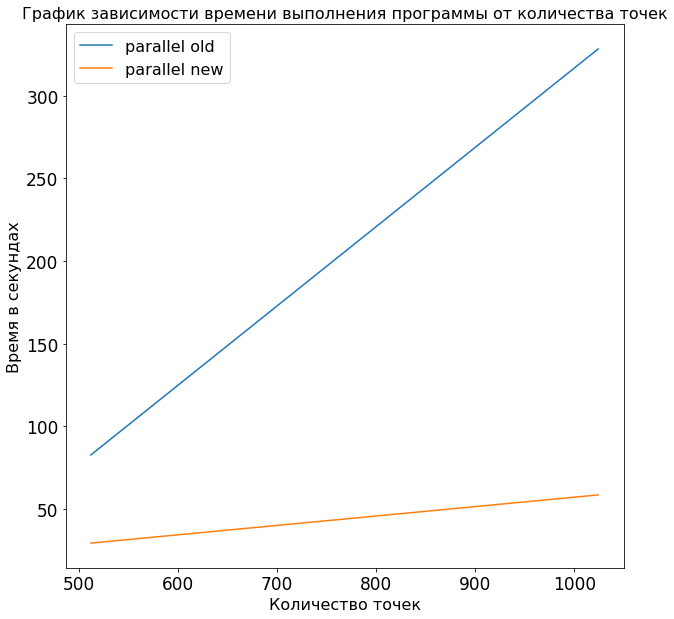

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(number_of_points_new, mean_time_parallel_old)
plt.plot(number_of_points_new, mean_time_parallel_new)
# plt.plot(number_of_points_new, mean_time_serial_new)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel('Количество точек', fontsize=16)
plt.ylabel('Время в секундах', fontsize=16)
plt.title("График зависимости времени выполнения программы от количества точек", size=16)
plt.legend(['parallel old','parallel new'], fontsize=16)
# plt.legend(['parallel old','parallel new', 'serial'], fontsize=16)

In [21]:
# S = T_serial/T_parallel
speed_up_new = []
speed_up_old = []
for i in range(len(number_of_points_new)):
    speed_up_old.append(mean_time_serial_new[i]/mean_time_parallel_old[i])
    speed_up_new.append(mean_time_serial_new[i]/mean_time_parallel_new[i])

Text(0.5, 1.0, 'График зависимости ускорения от количества точек')

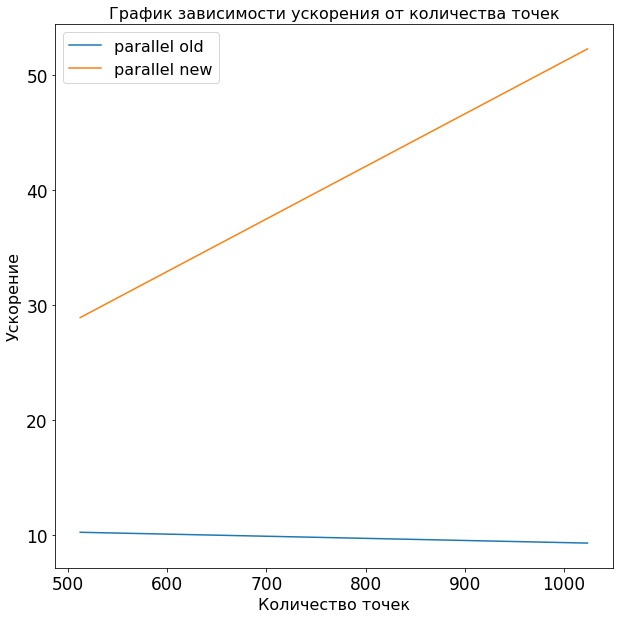

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(number_of_points_new, speed_up_old)
plt.plot(number_of_points_new, speed_up_new)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel('Количество точек', fontsize=16)
plt.ylabel('Ускорение', fontsize=16)
plt.legend(['parallel old','parallel new'], fontsize=16)
plt.title("График зависимости ускорения от количества точек", size=16)

In [25]:
# E = speed_up/number of threads
efficiency_old = []
efficiency_new = []
for i in range(len(number_of_points_new)):
    efficiency_old.append(speed_up_old[i]/number_of_points_new[i])
    efficiency_new.append(speed_up_new[i]/32)

Text(0.5, 1.0, 'График зависимости эффективности от количества точек')

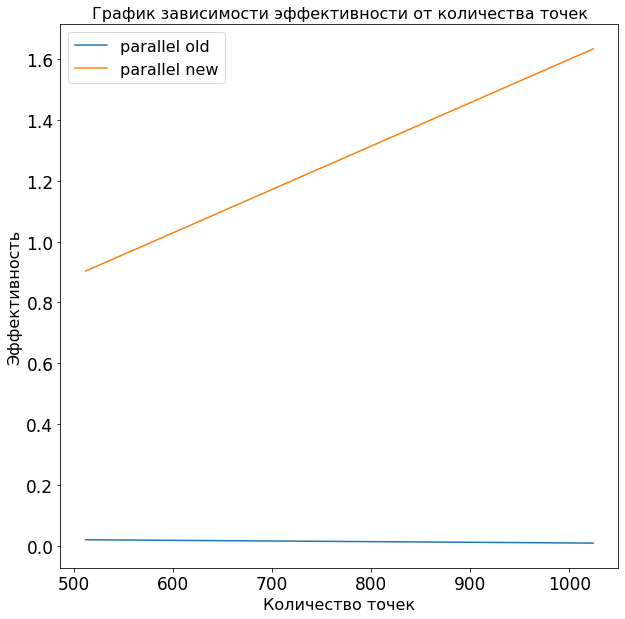

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(number_of_points_new, efficiency_old)
plt.plot(number_of_points_new, efficiency_new)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel('Количество точек', fontsize=16)
plt.ylabel('Эффективность', fontsize=16)
plt.legend(['parallel old','parallel new'], fontsize=16)
plt.title("График зависимости эффективности от количества точек", size=16)